In [1]:
import torch

In [2]:
from pysdtw import SoftDTW

In [14]:
batch_sizes = [1000]
seq_lens = [50, 100, 1000]
dim_lens = [1, 10, 100, 1000]

In [4]:
import itertools

In [5]:
from timeit import default_timer as timer

In [15]:
logs = []
for batch_size in batch_sizes:
    # for a, b in [i for i in itertools.permutations(seq_len, 2)]:
    for seq_len in seq_lens:
        for dim_len in dim_lens:
            start = timer()
            A = torch.rand((batch_size, seq_len, dim_len))
            B = torch.rand((batch_size, seq_len, dim_len))
            
            sdtw = SoftDTW()
            res = %timeit -o sdtw(A.cuda(), B.cuda())
            sdtw_cpu = SoftDTW(use_cuda=False)
            res_cpu = %timeit -o sdtw_cpu(A, B)
            
            end = timer()
            
            print("{} {} {} {:.2f}".format(batch_size, seq_len, dim_len, end-start))
            logs.append((batch_size, seq_len, dim_len, res, res_cpu))

5.59 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.6 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1000 50 1 6.20
6.1 ms ± 217 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
20.8 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1000 50 10 6.66
12.2 ms ± 65.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.1 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1000 50 100 12.04
71.6 ms ± 334 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
96.8 ms ± 2.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1000 50 1000 14.04
17.8 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
86.7 ms ± 2.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1000 100 1 8.55
19.1 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
95.8 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1000 100 10 9.32
31 ms ± 1.02 ms per loop (mean ± std. dev. of 7 run

RuntimeError: CUDA out of memory. Tried to allocate 3.73 GiB (GPU 0; 7.77 GiB total capacity; 3.74 GiB already allocated; 1.91 GiB free; 3.75 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [18]:
import pandas as pd

In [39]:
df = pd.DataFrame(logs)

In [40]:
df[['avg', 'cmp']] = df[3].apply(lambda x: (x.average, x.compile_time)).to_list()

In [41]:
df[['avg_', 'cmp_']] = df[4].apply(lambda x: (x.average, x.compile_time)).to_list()

In [73]:
df.head(1)

,batch,seq,dim,3,4,g_avg,g_cpl,c_avg,c_cpl
0,1,50,1,690 µs ± 23 µs per loop (mean ± std. dev. of 7...,220 µs ± 1.7 µs per loop (mean ± std. dev. of ...,0.00069,0.000076,0.00022,0.000042


In [63]:
df.columns = ['batch', 'seq', 'dim', 3, 4, 'g_avg', 'g_cpl', 'c_avg', 'c_cpl']

In [74]:
df.head(1)

,batch,seq,dim,3,4,g_avg,g_cpl,c_avg,c_cpl
0,1,50,1,690 µs ± 23 µs per loop (mean ± std. dev. of 7...,220 µs ± 1.7 µs per loop (mean ± std. dev. of ...,0.00069,0.000076,0.00022,0.000042


In [69]:
df.to_csv("logs.df")

In [72]:
pd.read_csv("logs.df", index_col=0)

,batch,seq,dim,3,4,g_avg,g_cpl,c_avg,c_cpl
0,1,50,1,690 µs ± 23 µs per loop (mean ± std. dev. of 7...,220 µs ± 1.7 µs per loop (mean ± std. dev. of ...,0.000690,0.000076,0.000220,0.000042
1,1,50,10,704 µs ± 16.6 µs per loop (mean ± std. dev. of...,253 µs ± 5.23 µs per loop (mean ± std. dev. of...,0.000704,0.000043,0.000253,0.000043
2,1,50,100,704 µs ± 28.4 µs per loop (mean ± std. dev. of...,263 µs ± 4.52 µs per loop (mean ± std. dev. of...,0.000704,0.000048,0.000263,0.000041
3,1,50,1000,778 µs ± 17 µs per loop (mean ± std. dev. of 7...,305 µs ± 3.45 µs per loop (mean ± std. dev. of...,0.000778,0.000043,0.000305,0.000042
4,1,100,1,1.07 ms ± 22.3 µs per loop (mean ± std. dev. o...,511 µs ± 1.35 µs per loop (mean ± std. dev. of...,0.001068,0.000042,0.000511,0.000042
5,1,100,10,1.06 ms ± 21 µs per loop (mean ± std. dev. of ...,586 µs ± 2.7 µs per loop (mean ± std. dev. of ...,0.001064,0.000044,0.000586,0.000041
6,1,100,100,1.07 ms ± 19.4 µs per loop (mean ± std. dev. o...,625 µs ± 2.97 µs per loop (mean ± std. dev. of...,0.001073,0.000044,0.000625,0.000043
7,1,100,1000,1.19 ms ± 10.3 µs per loop (mean ± std. dev. o...,719 µs ± 2.18 µs per loop (mean ± std. dev. of...,0.001192,0.000045,0.000719,0.000043
8,1,1000,1,34.8 ms ± 1.37 ms per loop (mean ± std. dev. o...,41.7 ms ± 525 µs per loop (mean ± std. dev. of...,0.034845,0.000045,0.041652,0.000043
9,1,1000,10,34.9 ms ± 1.37 ms per loop (mean ± std. dev. o...,46 ms ± 237 µs per loop (mean ± std. dev. of 7...,0.034924,0.000045,0.046042,0.000042


<AxesSubplot:>

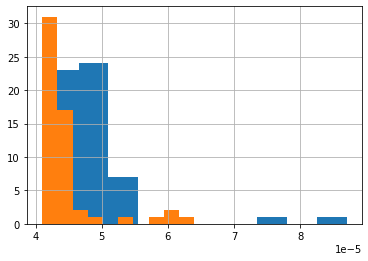

In [65]:
df['g_cpl'].hist()
df['c_cpl'].hist()

In [53]:
import seaborn as sns

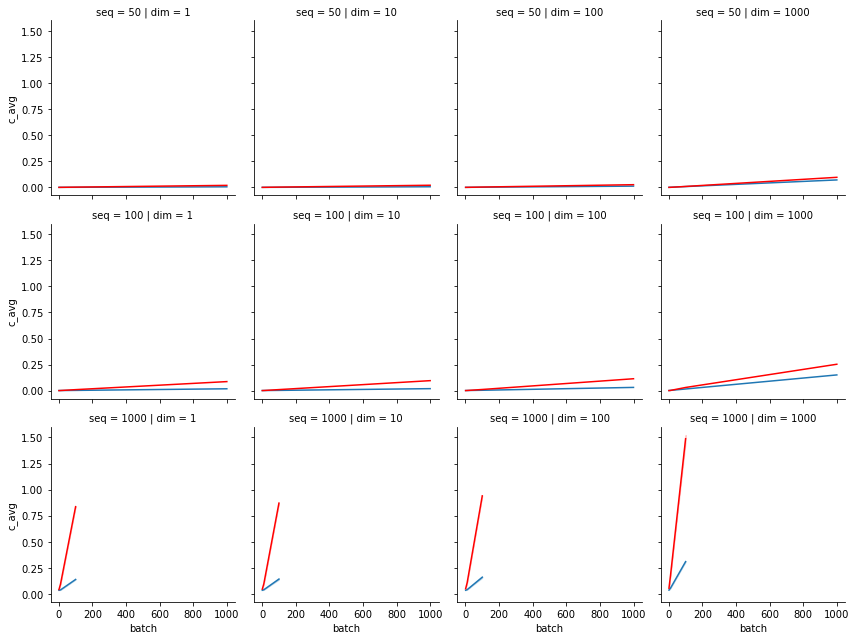

In [67]:
g = sns.FacetGrid(df, row='seq', col='dim')
g.map(sns.lineplot, 'batch', 'g_avg')
g.map(sns.lineplot, 'batch', 'c_avg', color='r')